<a href="https://colab.research.google.com/github/akashmeruva9/Machine-Learning/blob/main/ML_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Distance and Distance Matrix [20-03-2024]

### 1.Take two 3D coordinates from the user. Find out the distance between these pointsusing following distance functions. x and y are vectors representing the coordinates of two points. Here, k=3

In [2]:
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

# Function to calculate Manhattan distance
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Function to calculate Minkowski distance
def minkowski_distance(x, y, k):
    return np.power(np.sum(np.power(np.abs(x - y), k)), 1/k)

# Get input coordinates from the user or generate random coordinates
try:
    x = np.array(list(map(float, input("Enter the first  coordinate : ").split(','))))
    y = np.array(list(map(float, input("Enter the second  coordinate: ").split(','))))
except ValueError:
    print("Invalid input. Generating random coordinates.")
    x = np.random.rand(3)
    y = np.random.rand(3)

# Calculate distances using different distance functions
euclidean_dist = euclidean_distance(x, y)
manhattan_dist = manhattan_distance(x, y)
minkowski_dist = minkowski_distance(x, y, 3)

# Print the coordinates and distances
print(f"First 3D Coordinate: {x}")
print(f"Second 3D Coordinate: {y}")
print(f"Euclidean Distance: {euclidean_dist}")
print(f"Manhattan Distance: {manhattan_dist}")
print(f"Minkowski Distance (k=3): {minkowski_dist}")

Enter the first  coordinate : 1 2 3
Invalid input. Generating random coordinates.
First 3D Coordinate: [0.36995735 0.72688205 0.33091892]
Second 3D Coordinate: [0.92195653 0.43913554 0.45931087]
Euclidean Distance: 0.6355986478519714
Manhattan Distance: 0.968137641489964
Minkowski Distance (k=3): 0.5790324576384666


### 2.Import the Iris dataset. Write a program to obtain the Euclidian Distance Matrix for all the data samples in the feature space. Distance metric is a 2D array, where the(i,j)th entry represents the distance between the ith and jth sample points in the feature space.

In [3]:
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Function to calculate Euclidean distance between two points
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Calculate the number of samples
n_samples = X.shape[0]

# Initialize the Euclidean Distance Matrix
dist_matrix = np.zeros((n_samples, n_samples))

# Calculate the Euclidean Distance Matrix
for i in range(n_samples):
    for j in range(n_samples):
        dist_matrix[i, j] = euclidean_distance(X[i], X[j])

# Print the Euclidean Distance Matrix
print("Euclidean Distance Matrix:")
print(dist_matrix)

Euclidean Distance Matrix:
[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


### 3.Import the Iris dataset. Prepare a dataset considering samples belong to any two output classes. Draw the scatter plot for all the samples in the new dataset considering any two input attributes. Examine the scatter plot to find the equation of a line that can separate sample of two classes.

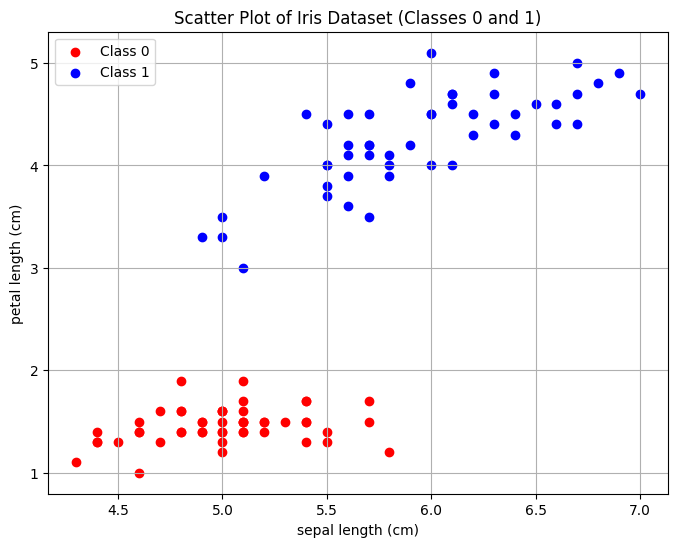

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select two classes (e.g., classes 0 and 1)
class_1 = 0
class_2 = 1

# Create a new dataset with samples belonging to the selected classes
selected_indices = np.where((y == class_1) | (y == class_2))[0]
X_selected = X[selected_indices]
y_selected = y[selected_indices]

# Select any two input attributes (features)
feature1_index = 0  # Choose the first feature (e.g., sepal length)
feature2_index = 2  # Choose the second feature (e.g., petal length)

# Create a DataFrame for easy plotting
df = pd.DataFrame(X_selected, columns=iris.feature_names)
df['target'] = y_selected

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[df['target'] == class_1].iloc[:, feature1_index],
            df[df['target'] == class_1].iloc[:, feature2_index],
            color='red', label=f'Class {class_1}')
plt.scatter(df[df['target'] == class_2].iloc[:, feature1_index],
            df[df['target'] == class_2].iloc[:, feature2_index],
            color='blue', label=f'Class {class_2}')
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title(f'Scatter Plot of Iris Dataset (Classes {class_1} and {class_2})')
plt.legend()
plt.grid(True)
plt.show()
